In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.interpolate import make_interp_spline, BSpline

from scipy.stats import mannwhitneyu
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [250]:
full_df = pd.read_csv('Data/flow_time_series.csv')
red_df = pd.read_csv('Data/red_time_series.csv')

In [251]:
full_df['time'] = full_df['time'].astype('int64')
red_df['time'] = red_df['time'].astype('int64')

In [252]:
full_df = full_df.sort_values('time')
red_df = red_df.sort_values('time')

In [253]:
red_df['Log_Upload'] = np.log2(red_df['Upload'])
red_df['Log_Download'] = np.log2(red_df['Download'])

full_df['Log_Upload'] = np.log2(full_df['Upload'])
full_df['Log_Download'] = np.log2(full_df['Download'])

full_df['sqrt_Upload'] = np.sqrt(full_df['Upload'])
full_df['sqrt_Download'] = np.sqrt(full_df['Download'])

red_df['sqrt_Upload'] = np.sqrt(red_df['Upload'])
red_df['sqrt_Download'] = np.sqrt(red_df['Download'])


In [254]:
full_sum_df = full_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique})
red_sum_df = red_df.groupby('time',as_index=False).agg({'mean_duration':'mean', 'Upload':'sum','Download':'sum','user':pd.Series.nunique,'Log_Download':'sum','Log_Upload':'sum'})
              

In [255]:
stat, p = mannwhitneyu(full_df['Log_Upload'], red_df['Log_Upload'])
p

1.2472090832688178e-20

In [256]:
p

1.2472090832688178e-20

# Attempt to use KDE to create distrobution

In [257]:
full_kernel = stats.gaussian_kde(full_df['Log_Upload'])
red_kernel = stats.gaussian_kde(red_df['Log_Upload'])

In [258]:
x = np.linspace(0,40,100)


In [259]:
red_kernel(random.sample(list(red_df['Log_Upload']),1))

array([0.20717762])

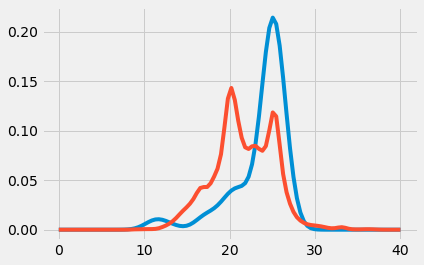

In [260]:
plt.plot(x,red_kernel(x))
plt.plot(x,full_kernel(x))

array([0.03799057])

Text(0.5, 1.0, 'KDE for Compromised Population and Total Population')

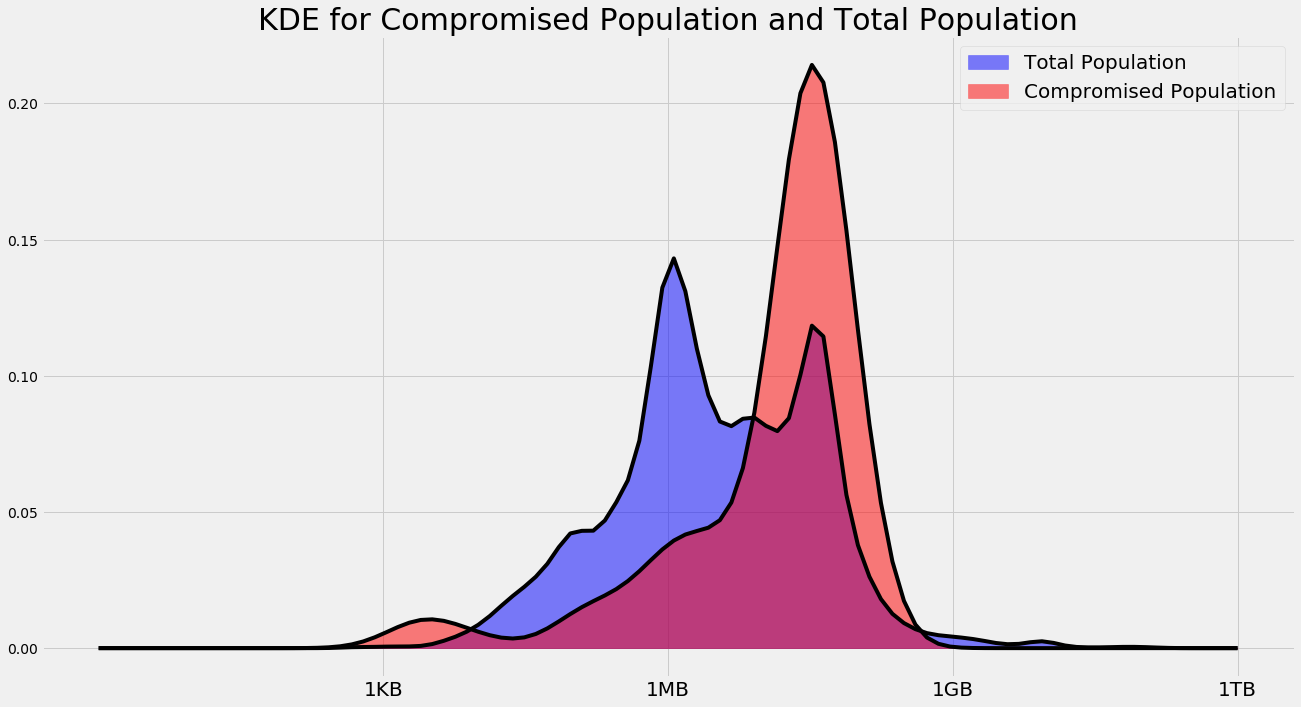

In [303]:
fig, ax = plt.subplots(figsize=(20,11))
ax.plot(x,red_kernel(x),color='black')
ax.plot(x,full_kernel(x),color='black')
ax.fill_between(x, full_kernel(x), where=full_kernel(x)>=0, interpolate=True, color='blue',alpha=.5,label='Total Population')
ax.fill_between(x, red_kernel(x), where=red_kernel(x)>=0, interpolate=True, color='red',alpha=.5,label='Compromised Population')
plt.xticks([10,20,30,40],['1KB','1MB','1GB','1TB'],fontsize=20)
plt.legend(prop={'size': 20})
plt.title('KDE for Compromised Population and Total Population',fontsize=30)


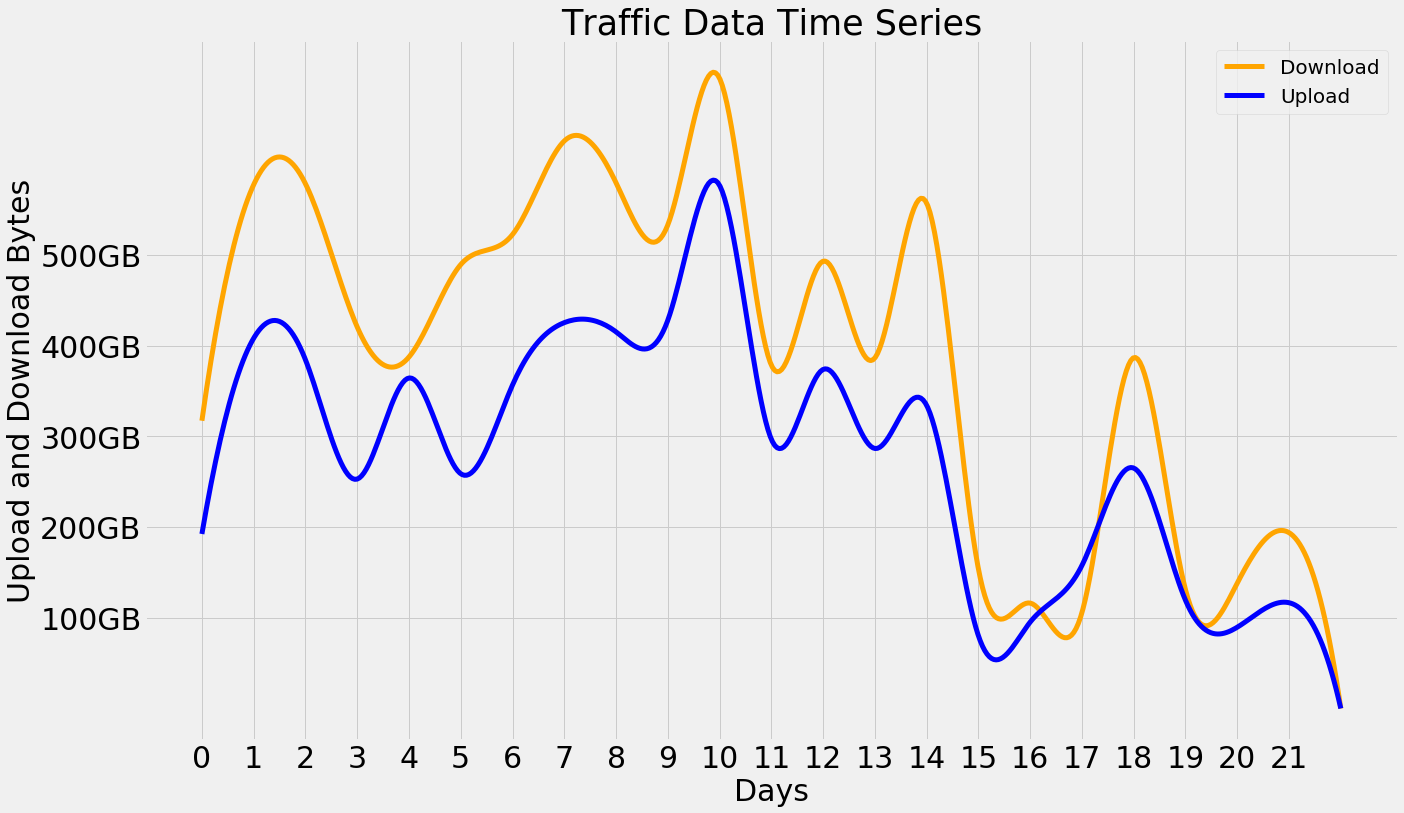

In [300]:
fig, ax = plt.subplots(figsize=(20,12))


xnew = np.linspace(red_sum_df['time'].min(),red_sum_df['time'].max(),500)
up_spl = make_interp_spline(red_sum_df['time'],red_sum_df['Upload'] , k=3)
down_spl = make_interp_spline(red_sum_df['time'],red_sum_df['Download'] , k=3)
up_smooth = up_spl(xnew)
down_smooth = down_spl(xnew)

ax.plot(xnew,down_smooth, color='orange',lw=5,label='Download')
ax.plot(xnew,up_smooth, color='blue',lw=5,label='Upload')

#ax.plot(full_sum_df['time'],red_sum_df['user']*20000000, color='g',lw=5)
days_sec = range(22)
days_sec = np.array(days_sec)*86400

plt.title('Traffic Data Time Series',fontsize=35)
plt.yticks([100*(1024**2),200*(1024**2),300*(1024**2),400*(1024**2),500*(1024**2)],['100GB','200GB','300GB','400GB','500GB',],fontsize=30)
plt.xticks(days_sec,range(22),fontsize=30)
plt.xlabel('Days',fontsize=30)
plt.ylabel('Upload and Download Bytes',fontsize=30)
plt.legend(prop={'size': 20})


# Red Team Timeseries

Text(0, 0.5, 'Upload and Download Bytes')

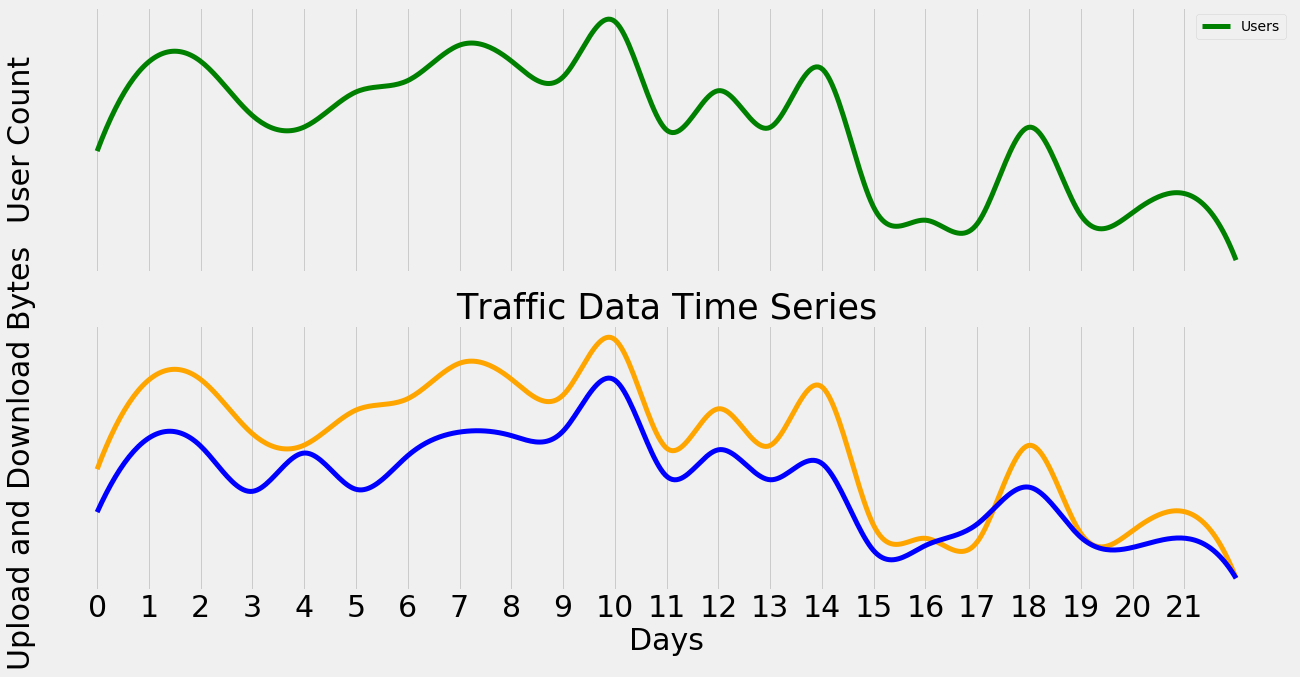

In [299]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True,figsize=(20,10))


xnew = np.linspace(red_sum_df['time'].min(),red_sum_df['time'].max(),500)
up_spl = make_interp_spline(red_sum_df['time'],red_sum_df['Upload'] , k=3)
down_spl = make_interp_spline(red_sum_df['time'],red_sum_df['Download'] , k=3)
user_spl = make_interp_spline(red_sum_df['time'],red_sum_df['user'] , k=3)
up_smooth = up_spl(xnew)
down_smooth = down_spl(xnew)
user_smooth = down_spl(xnew)

ax2.plot(xnew,down_smooth, color='orange',lw=5,label='Download')
ax2.plot(xnew,up_smooth, color='blue',lw=5,label='Upload')

ax1.plot(xnew,user_smooth, color='g',lw=5,label='Users')
days_sec = range(22)
days_sec = np.array(days_sec)*86400
ax1.legend()
ax1.set_yticks([])
ax1.set_ylabel('User Count',fontsize=30)
plt.title('Traffic Data Time Series',fontsize=35)
#plt.yticks([100*(1024**2),200*(1024**2),300*(1024**2),400*(1024**2),500*(1024**2)],['100MB','200MB','300MB','400MB','500MB',])
plt.yticks([],[])
plt.xticks(days_sec,range(22),fontsize=30)
plt.xlabel('Days',fontsize=30)
plt.ylabel('Upload and Download Bytes',fontsize=30)




([<matplotlib.axis.YTick at 0x1a36c30d68>,
 <a list of 4 Text yticklabel objects>)

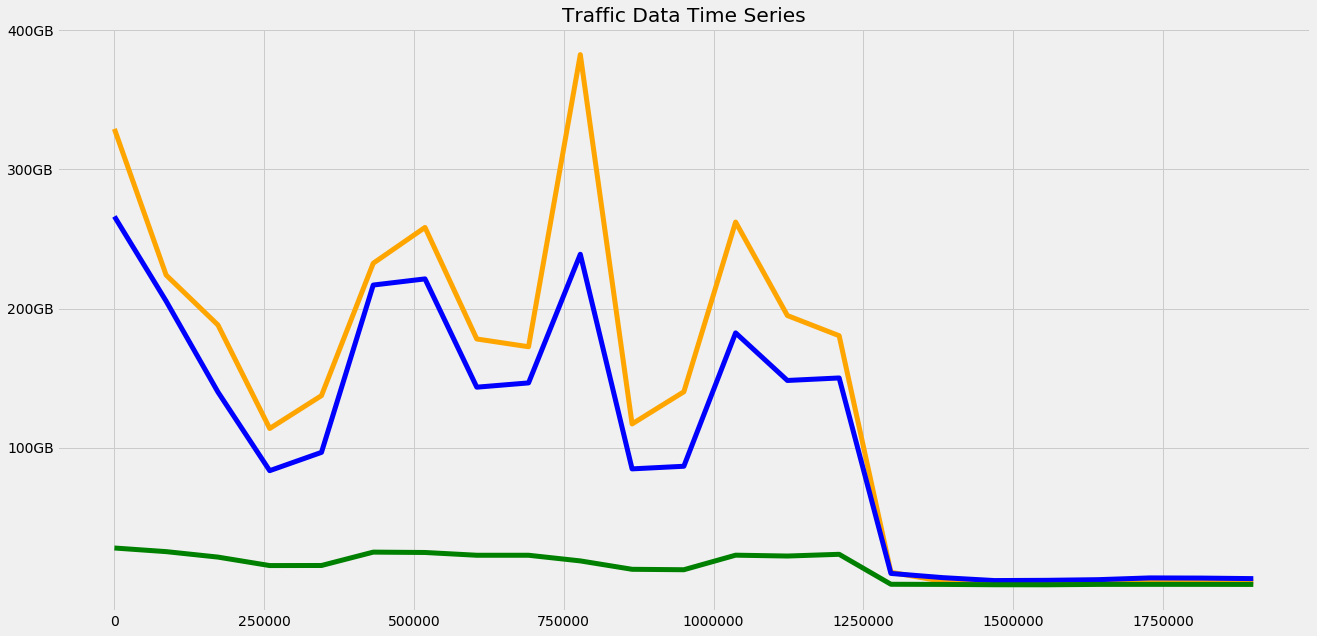

In [264]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(full_sum_df['time'],full_sum_df['Download'] , color='orange',lw=5)
ax.plot(full_sum_df['time'],full_sum_df['Upload'], color='blue',lw=5)

ax.plot(full_sum_df['time'],full_sum_df['user']*20000000, color='g',lw=5)

plt.title('Traffic Data Time Series')
plt.yticks([100*(1024**3),200*(1024**3),300*(1024**3),400*(1024**3)],['100GB','200GB','300GB','400GB',])


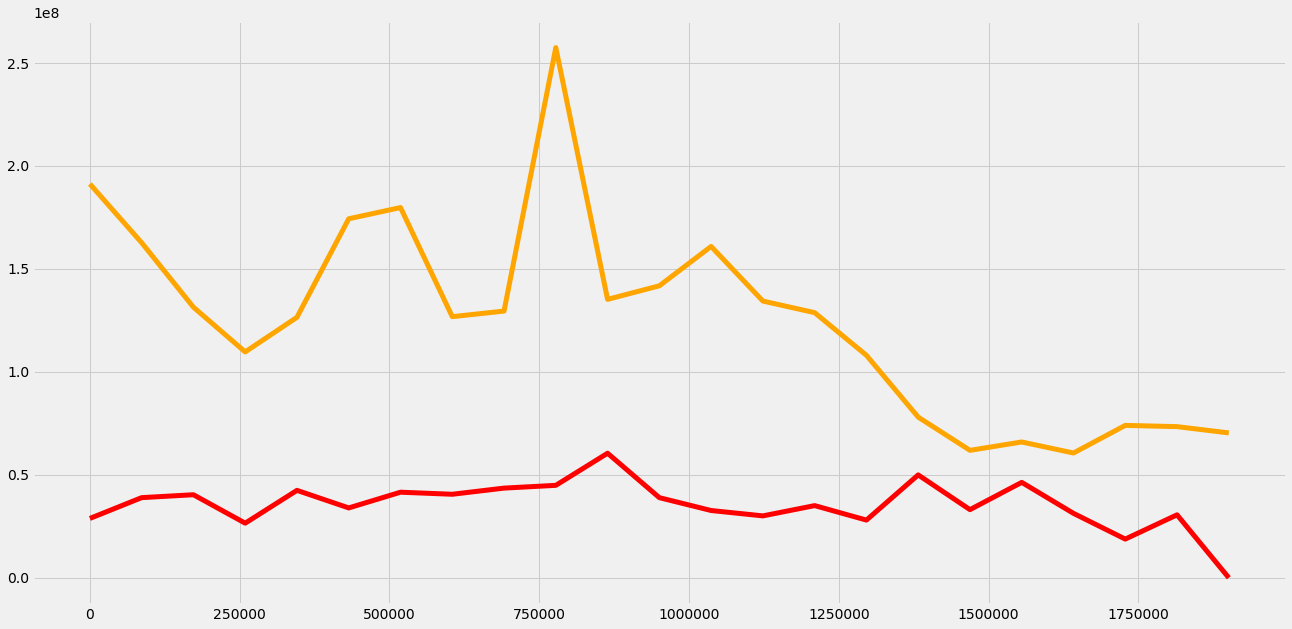

In [265]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(red_sum_df['time'],red_sum_df['Upload']/ red_sum_df['user'], color='red',lw=5,label='Compromised Uploads')
ax.plot(red_sum_df['time'],full_sum_df['Upload']/full_sum_df['user'], color='orange',lw=5,label = 'Total Population Uploads')


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Bootstrap Distribution')

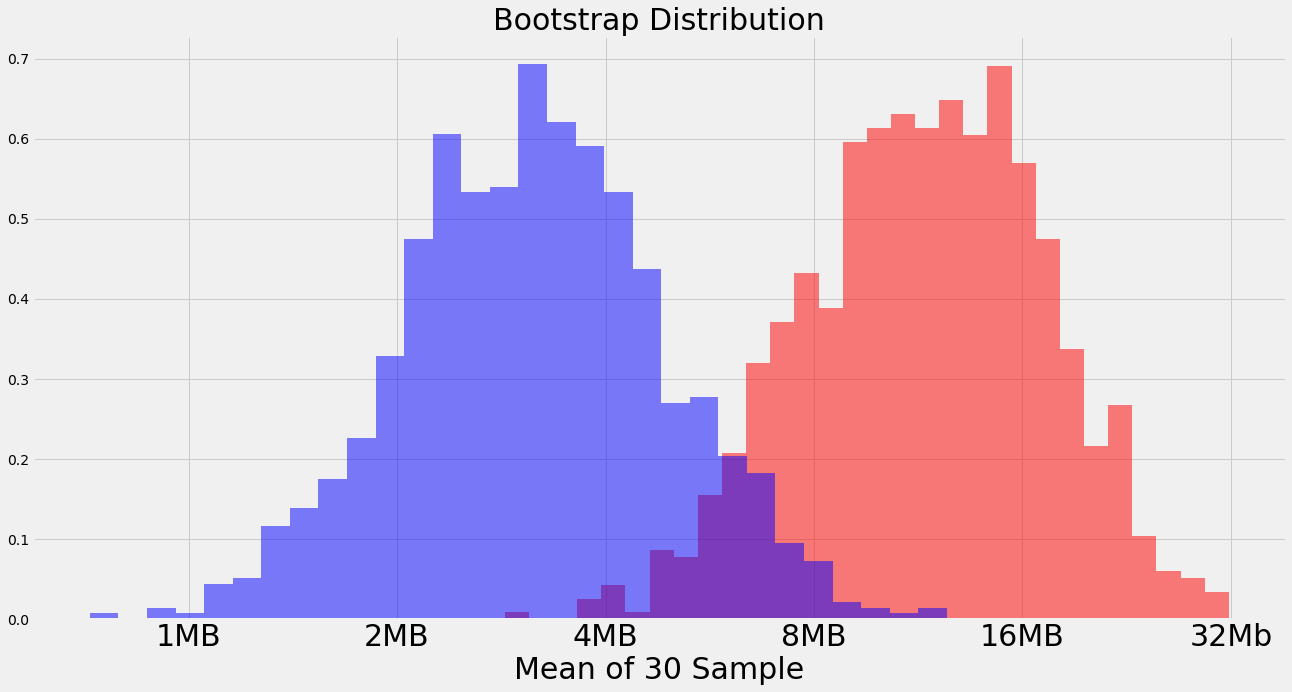

In [317]:
fig, ax = plt.subplots(figsize=(20,10))
red_bs = []
full_bs = []

for i in range(1000):
    red_bs.append(np.mean(random.sample(list(red_df['Log_Upload']),30)))
    full_bs.append(np.mean(random.sample(list(full_df['Log_Upload']),30)))
    
ax.hist(red_bs,normed=True,color='r',alpha=.5,bins=30)
ax.hist(full_bs,normed=True,color='b',alpha=.5,bins=30)

plt.xticks([20,21,22,23,24,25],['1MB','2MB','4MB','8MB','16MB','32Mb'],fontsize=30)
plt.xlabel('Mean of 30 Sample',fontsize=30)
plt.title('Bootstrap Distribution',fontsize=30)

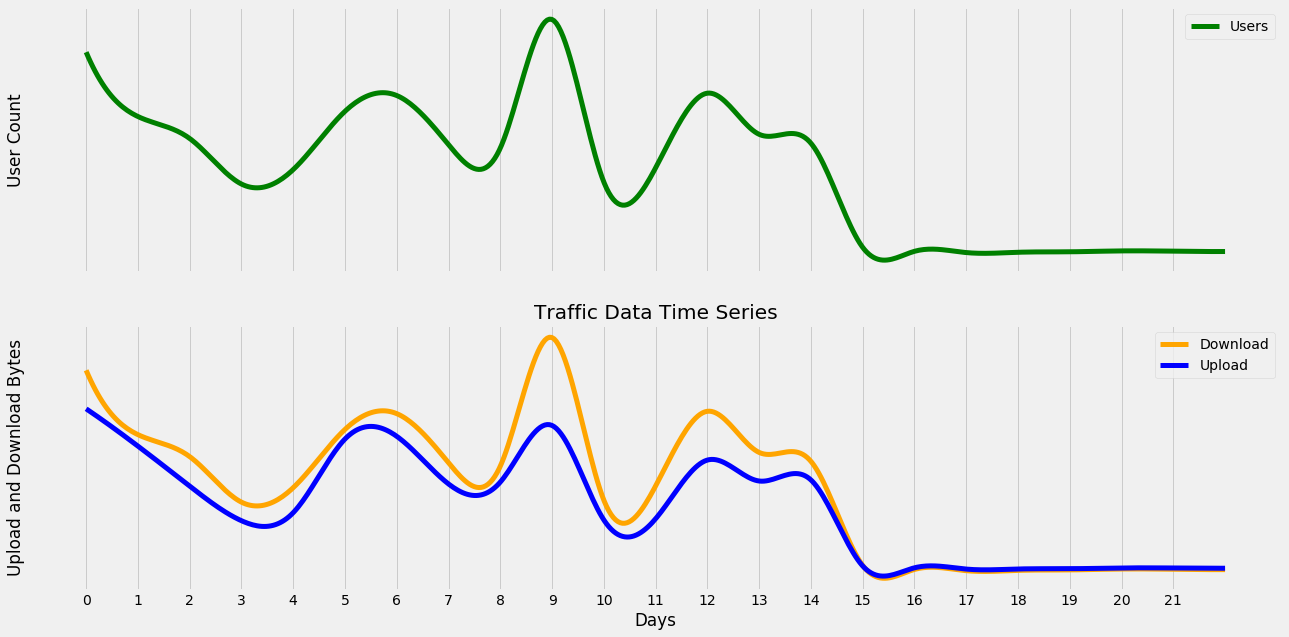

In [267]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True,figsize=(20,10))


xnew = np.linspace(full_sum_df['time'].min(),full_sum_df['time'].max(),500)
up_spl = make_interp_spline(full_sum_df['time'],full_sum_df['Upload'] , k=3)
down_spl = make_interp_spline(full_sum_df['time'],full_sum_df['Download'] , k=3)
user_spl = make_interp_spline(full_sum_df['time'],full_sum_df['user'] , k=3)
up_smooth = up_spl(xnew)
down_smooth = down_spl(xnew)
user_smooth = down_spl(xnew)

ax2.plot(xnew,down_smooth, color='orange',lw=5,label='Download')
ax2.plot(xnew,up_smooth, color='blue',lw=5,label='Upload')

ax1.plot(xnew,user_smooth, color='g',lw=5,label='Users')
days_sec = range(22)
days_sec = np.array(days_sec)*86400
ax1.legend()
ax1.set_yticks([])
ax1.set_ylabel('User Count')
plt.title('Traffic Data Time Series')
#plt.yticks([100*(1024**2),200*(1024**2),300*(1024**2),400*(1024**2),500*(1024**2)],['100MB','200MB','300MB','400MB','500MB',])
plt.yticks([],[])
plt.xticks(days_sec,range(22))
plt.xlabel('Days')
plt.ylabel('Upload and Download Bytes')
plt.legend()

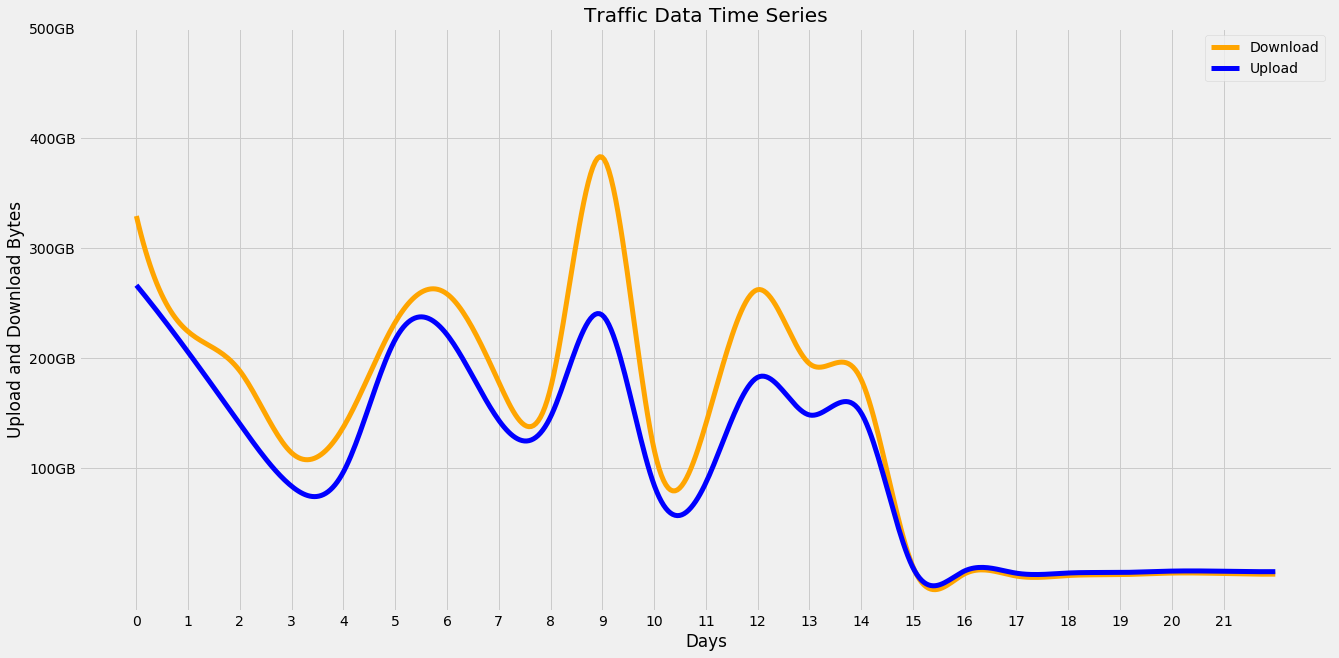

In [268]:
fig, ax = plt.subplots(figsize=(20,10))


xnew = np.linspace(full_sum_df['time'].min(),full_sum_df['time'].max(),500)
up_spl = make_interp_spline(full_sum_df['time'],full_sum_df['Upload'] , k=3)
down_spl = make_interp_spline(full_sum_df['time'],full_sum_df['Download'] , k=3)
up_smooth = up_spl(xnew)
down_smooth = down_spl(xnew)

ax.plot(xnew,down_smooth, color='orange',lw=5,label='Download')
ax.plot(xnew,up_smooth, color='blue',lw=5,label='Upload')

#ax.plot(full_sum_df['time'],full_sum_df['user']*20000000, color='g',lw=5)
days_sec = range(22)
days_sec = np.array(days_sec)*86400

plt.title('Traffic Data Time Series')
plt.yticks([100*(1024**3),200*(1024**3),300*(1024**3),400*(1024**3),500*(1024**3)],['100GB','200GB','300GB','400GB','500GB',])
plt.xticks(days_sec,range(22))
plt.xlabel('Days')
plt.ylabel('Upload and Download Bytes')
plt.legend()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'Daily Uploads of Total Population vs. Compromised Population')

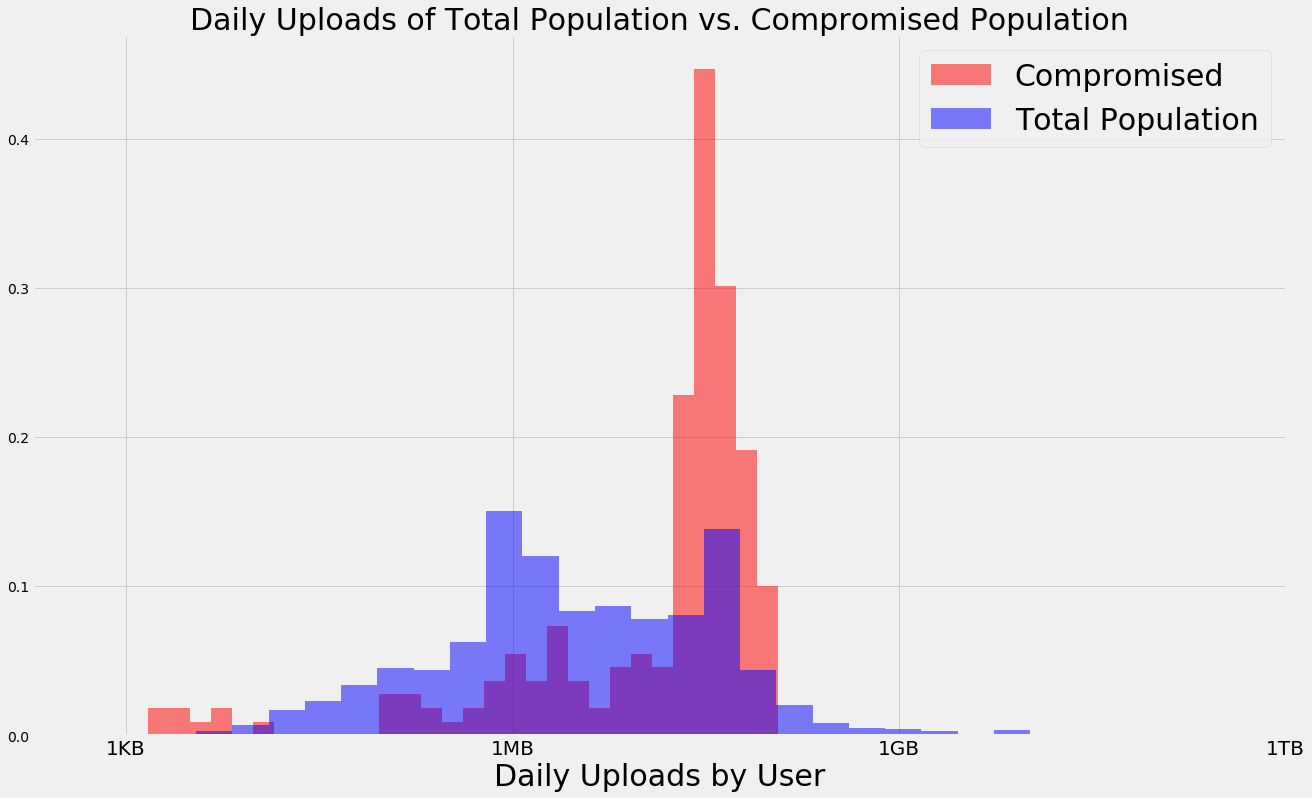

In [284]:
fig, ax = plt.subplots(figsize=(20,12))

    
ax.hist(red_df['Log_Upload'],normed=True,color='r',alpha=.5,bins=30,label='Compromised')
ax.hist(full_df['Log_Upload'],normed=True,color='b',alpha=.5,bins=30,label='Total Population')
plt.xticks([10,20,30,40],['1KB','1MB','1GB','1TB'],fontsize=20)
plt.legend(prop={'size': 30})
plt.xlabel('Daily Uploads by User',fontsize=30)
plt.title('Daily Uploads of Total Population vs. Compromised Population',fontsize=30)